# Word Embeddings

> **Embedding mathematically represents a mapping , f: X-> Y, which is a function**. 


Where the function is

•	**injective** (which is what we call an **injective function** , each Y has a unique X correspondence, and vice versa)

•	**structure-preserving** ( structure preservation , for example, X1 < X2 in the space to which X belongs, then the same applies to Y1 <Y2 in the space to which Y belongs after mapping).

> So for word embedding, the word word is mapped to another space, where this mapping has the characteristics of injective and structure-preserving.

Popular translation can be considered as word embedding, **which is to map the words in the space to which X belongs to a multi-dimensional vector in Y space , then the multi-dimensional vector is equivalent to embedding in the space to which Y belongs** , one carrot and one pit. 

1. Text data needs to be pre-processed into tensor form before it can be input to the neural network.
2. The process of dividing text into units is called tokenization, and the unit of division is called tokens.
3. Text can be divided into words, characters (abcdefg ...), n-gram and so on.
4. Generally use one-hot encoding or word-embedding to process words into numerical tensors.
5. One-hot encoding is simple, but without structure, the distance between any two words is √2.
6. The word-embedding space has small dimensions, structure in space, similar words are near, and unrelated words are far away.
7. The role of the embedding layer can actually be seen as a matrix that maps the points in the high-dimensional space to the low-dimensional space.

Word embedding is a form of word representation **that connects the human understanding of language to that of the machine**. Word embeddings are the distributed representations of text in an ample dimensional space. By looking at different researches in the area of deep learning, word embeddings are essential. **It is the approach of representing words and documents that may be considered as one of the crucial breakthroughs in the field of deep learning on challenging NLP problems.**

Word embeddings are a class of techniques **where the individual word, is represented as a real-valued vector in a vector space**. The main idea is to use a densely distributed representation for all the words.
Each word is represented by a real-value vector. Each word is mapped to a single vector, and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning.

This is contrasted to the thousands of dimensions required for sparse word representations, such as **One-Hot Encoding**. **They are essential for solving most NLP problems**.

**The neural network cannot train the original text data. We need to process the text data into numerical tensors first. This process is also called text vectorization.**

There are several strategies for text vectorization:
1. Split text into words, each word is converted into a vector
2. Split text into characters, each character is converted into a vector
3. Extract n-gram of words or characters n-gram to a vector

**The unit into which text is decomposed is called token, and the process of decomposing text into token is called tokenization.**

To put it simply, we need to input text data into a neural network and let it train. However, neural networks cannot directly process text data. We need to pre-process text data into a format that the neural network can understand, which is the following process:

**Text ----> Participle ----> Vectorization**


There are two main methods for word vectorization:
1. One-hot encoding
2. Word embedding

# **One-Hot encoding**

**Why is it called one-hot?** 

**After each word is one-hot encoded, only one position has an element of 1 and the other positions are all 0.**

For example, 
the sentence **"the boy is crying"** (assuming there are only four English words in the world), after one-hot encoding,

**the corresponds to (1, 0, 0, 0)**

**boy corresponds to (0, 1, 0 ， 0）**

**is corresponds to (0,0,1,0)**

**crying corresponds to (0,0,0,1)**

Each word corresponds to a position in the vector, and this position represents the word.

But this way requires a very high dimension, because if all vocabularies have 100,000 words, then each word needs to be represented by a vector of length 100,000.

**the corresponding to (1, 0, 0, 0, ..., 0) (length is 100,000)**

**boy corresponding to (0, 1, 0, 0, ..., 0)**

**is corresponding to (0, 0, 1, 0 , ..., 0)**

**crying corresponds to (0,0,0,1, ..., 0) to get high-dimensional sparse tensors.**




![img_credit_tensorflow.org]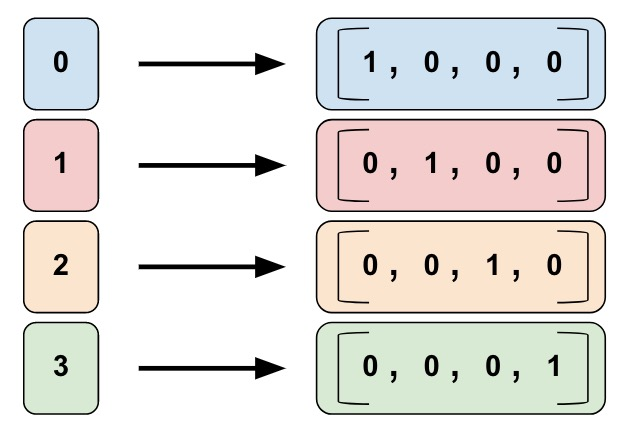

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Disadvatages of One HotEncoding

One-Hot coding is simple and easy to use, the disadvantages are also obvious:

>The length of the word vector is equal to the length of the vocabulary, and the word vector is extremely sparse. When the vocabulary is large, the computational complexity will be very large.

>Any two words are orthogonal, meaning that the relationship between words cannot be obtained from the One-Hot code

>The distance between any two words is equal, and the semantic relevance of the two words cannot be reflected from the distance


## **Embedding**
In contrast, word embedding embeds words into a low-dimensional dense space.

For example, the same **"the boy is crying"** sentence (assuming that there are only 4 English words in the world), after encoding, it may become:

**the corresponding (0.1)**

**boy corresponding (0.14)**

**is corresponding (0)**

**crying corresponding (0.82)**

We assume that the embedded space is 256 dimensions (generally 256, 512 or 1024 dimensions, the larger the vocabulary, the higher the corresponding spatial dimension)

**Then
the corresponding (
0.1,
0.2, 0.4,
0 , ...) (vector length is 256) boy corresponds to (0.23, 0.14, 0, 0 , ...) is corresponding to (0, 0 , 0.41, 0.9, ...) , 0.82, 0, 0.14, ...)**

One-hot encoding is very simple, but the spatial dimension is high and for one-hot encoding, the distance between any two words is $$\sqrt{2}$$.

 But in practice, the word **(boy) to word (man) should be very close** (because they are closely related), and **the word (cat) to word (stone) should be very far** (because they are basically unrelated).

Embedding space has low dimensions and allows space to have structure .

For example, the distance between the vectors can reflect gender, age, etc. (this requires training, and the unembedding layer has no structure), for example:

**man-woman = boy-girl**

**man-daddy = woman-mother**

In Keras, the Embedding layer requires two parameters, one is the number of words in the token, and the other is the embedded dimension

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(1000,64)

1000 : The length of the token is 1000 (can be considered as the number of all words in the vocabulary)

64 : Represents embedded 64-dimensional space (64 attributes can be considered, such as imaginary adult eye shape, nose shape, mouth shape, height, weight, age, etc., together, it is a person (word). A word, a thousand such words means all the words in the vocabulary)

Embedding layer input : a two-dimensional tensor with the shape (samples, sequential_length)
samples: represent different sentences.
sequential_length: represents the number of words in the sentence, each word corresponds to a number, a total of sequential_length words.

The output of the embedding layer : a three-dimensional tensor with the shape (samples, sequential_length, dimensionality)
samples: Represent different sentences.
sequential_length: represents the number of words in a sentence.
dimensionality: represents the number of channels. A vector of values ​​on all channels on the same samples and the same sequential_length represents a word, such as (0,0, :) represents a word.

The embedding layer can be regarded as a matrix , assuming that the input is (100, 20), 100 sequences of length 20, the vocabulary length is 10000, Embedding (10000, 8), and the output is (100, 20, 8)
because After one-hot encoding, each sequence can be regarded as (20, 10000), and the matrix of (10000, 8) is multiplied to get the matrix of (20, 8), so 100 such sequences pass through the embedding layer. Becomes (100, 20, 8)

In [ ]:
!pip install Keras==2.3.1
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 9.4 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
  Attempting uninstall: Keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.3.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.3 MB 3.2 kB/s 
     |████████████████████████████████| 3.0 MB 39.7 MB/s 
     |████████████████████████████████| 2.9 MB 30.7 MB/s 
     |████████████████████████████████| 454 kB 60.4 MB/s 
     |████████████████████████████████| 26.0 MB 1.4 MB/s 
     |████████████████████████████████| 152 kB 53.1 MB/s 
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.2.0
    Uninstalling cachetools-5.2.0:
      Successfully uninstalled cachetools-5.2.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.15.0
    Uninstalling google-auth-2.15.0:
      Successfully uninstalled google-auth-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
 

In [ ]:
#Instantiate an Embedding layer

from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding

model = Sequential()
model.add(Embedding(10000,8,input_length=20))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten,Dense,Embedding
#from keras_preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 20

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)


model = Sequential()

model.add(Embedding(10000,8,input_length=maxlen))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.8/dist-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/dist-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
##Label Encoding is already applied
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]], dtype=int32)

In [ ]:
x_test

array([[ 286,  170,    8, ...,   14,    6,  717],
       [  10,   10,  472, ...,  125,    4, 3077],
       [  34,    2,   45, ...,    9,   57,  975],
       ...,
       [ 226,   20,  272, ...,   21,  846, 5518],
       [  55,  117,  212, ..., 2302,    7,  470],
       [  19,   14,   20, ...,   34, 2005, 2643]], dtype=int32)

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 96us/step - loss: 0.6802 - acc: 0.5900 - val_loss: 0.6486 - val_acc: 0.6764
Epoch 2/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.5736 - acc: 0.7394 - val_loss: 0.5479 - val_acc: 0.7218
Epoch 3/10
20000/20000 [==============================] - 2s 79us/step - loss: 0.4765 - acc: 0.7838 - val_loss: 0.5082 - val_acc: 0.7418
Epoch 4/10
20000/20000 [==============================] - 2s 82us/step - loss: 0.4253 - acc: 0.8095 - val_loss: 0.4968 - val_acc: 0.7470
Epoch 5/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.3917 - acc: 0.8262 - val_loss: 0.4982 - val_acc: 0.7524
Epoch 6/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.3651 - acc: 0.8421 - val_loss: 0.5023 - val_acc: 0.7496
Epoch 7/10
20000/20000 [==============================] - 2s 76us/step - loss: 0.3427 - acc: 0.8540 - val_loss: 0.5084 - val_acc:

#### It can be seen that in the embedding layer, we need to train 8 times 10000 = 80,000 parameters. Each row in the trained embedding layer represents a vector of words.

>Use the Embedding layer and classifier on IMDB data.

>The imdb data set built in keras has classified positive and negative evaluations and vectorized evaluation content. We use the Embedding layer and classifier to train a neural network. How well did it perform.


#### Draw a picture and observe a wave carefully:

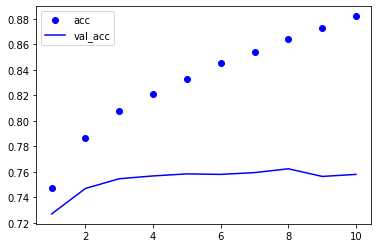

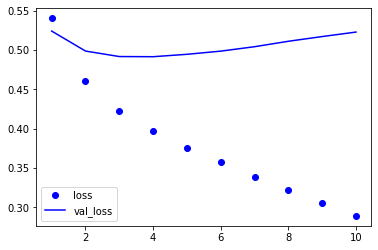

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='acc')
plt.plot(epochs,val_acc,'b',label='val_acc')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='loss')
plt.plot(epochs,val_loss,'b',label='val_loss')
plt.legend()

plt.show()

#### It can be seen that the verification accuracy is about 75%.

# BOW

**Bag-of-words model is a commonly used document representation method in the field of information retrieval .**

>In information retrieval, the BOW model assumes that for a document, it ignores its word order, grammar, syntax and other factors, and treats it as a collection of several words. The appearance of each word in the document is independent and independent of whether other words appear. **(It's out of order)**

>The Bag-of-words model (BoW model) ignores the grammar and word order of a text, and uses a set of unordered words to express a text or a document.

#### Let's take an example

`John likes to watch movies. Mary likes too.`

`John also likes to watch football games.`

Build a dictionary based on the words that appear in the above two sentences:

`{"John": 1, "likes": 2, "to": 3, "watch": 4, "movies": 5, "also": 6, "football": 7, "games": 8, "Mary": 9, "too": 10}`


The dictionary contains 10 words, each word has a unique index. Note that their order is not related to the order in which they appear in the sentence. According to this dictionary, we re-express the above two sentences into the following two vectors:

`[1, 2, 1, 1, 1, 0, 0, 0, 1, 1]`

`[1, 1, 1, 1, 0, 1, 1, 1, 0, 0]`


These two vectors contain a total of 10 elements, where the i-th element represents the number of times the i-th word in the dictionary appears in the sentence. 

Now imagine a **huge document set D with a total of M documents**. After all the words in the document are extracted, they form a dictionary containing N words. Using the Bag-of-words model, **each document can be represented as an N-dimensional vector**.


Therefore, the BoW model can be considered as a statistical histogram. It is used in text retrieval and processing applications.

## TF-IDF

**TF-IDF (Term Frequency-Inverse Document Frequency)**, a commonly used weighting technique for information retrieval and information exploration.

TF-IDF is a statistical method used to evaluate the importance of a word to a file set or a file in a corpus. The importance of the word increases in proportion to the number of times it appears in the file, but at the same time decreases inversely with the frequency of its appearance in the corpus.

* **Term frequency TF (item frequency)**: number of times a given word appears in the text. This number is usually normalized (the numerator is generally smaller than the denominator) to prevent it from favoring long documents, because whether the term is important or not, it is likely to appear more often in long documents than in paragraph documents.

> **TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).**

Term frequency (TF) indicates how often a term (keyword) appears in the text .

This number is usually normalized (usually the word frequency divided by the total number of words in the article) to prevent it from favoring long documents.

**Formula of Tf**    ![title](img/tf.png)


where  ni, j  is the number of occurrences of the word in the file  dj  , and the denominator is the sum of the occurrences of all words in the file dj;

* **Inverse document frequency (IDF)**: A measure of the general importance of a word. The main idea is that if there are fewer documents containing the entry t and the larger, it means that the entry has a good ability to distinguish categories. The IDF of a specific word can be calculated by dividing the total number of files by the number of files containing the word, and then taking the log of the obtained quotient.

>**IDF(t) = log_e(Total number of documents / Number of documents with term t in it).**

**Formula of Idf**  ![title](img/idf1.png)


among them

* | D |: Total number of files in the corpus

* |  {  $j: $t_{i}$ \in $d_{j} $$  }  | : The number of files containing words $t_{i}$ ( $n_{i,j}$ $\neq$ 0 , the number of files). If the word is not in the corpus, it will cause the dividend to be zero, so it is generally used.1 + |  {  $j :$t_{i}$ \in $d_{j}$$  }  |.


**So, Formula of tf-Idf** ![title](img/ttttt.png)

#### Example:

Consider a document containing 100 words where in the word cat appears 3 times. 

The **term frequency (Tf) for cat** is then **(3 / 100) = 0.03**. Now, assume we have 10 million documents and the word cat appears in one thousand of these.

Then, the **inverse document frequency (Idf)** is calculated as **log(10,000,000 / 1,000) = 4.** 

Thus, the **Tf-idf** weight is the product of these quantities: **0.03 * 4 = 0.12.**

#### TF-IDF application

1.  **Search engine**
2.  **Keyword extraction**
3.  **Text similarity**
4.  **Text summary**

## Code Implementation

### Python3 implements TF-IDF algorithm

In [ ]:

from collections import defaultdict
import math
import operator
 

def loadDataSet():
    dataset = [ ['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],    
                   ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                   ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                   ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                   ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                   ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid'] ]
    classVec = [0, 1, 0, 1, 0, 1]  
    return dataset, classVec
 

def feature_select(list_words):
    
    doc_frequency=defaultdict(int)
    for word_list in list_words:
        for i in word_list:
            doc_frequency[i]+=1
 
    
    word_tf={}  
    for i in doc_frequency:
        word_tf[i]=doc_frequency[i]/sum(doc_frequency.values())
 
    
    doc_num=len(list_words)
    word_idf={} 
    word_doc=defaultdict(int) 
    for i in doc_frequency:
        for j in list_words:
            if i in j:
                word_doc[i]+=1
    for i in doc_frequency:
        word_idf[i]=math.log(doc_num/(word_doc[i]+1))
 
    
    word_tf_idf={}
    for i in doc_frequency:
        word_tf_idf[i]=word_tf[i]*word_idf[i]
 
    
    dict_feature_select=sorted(word_tf_idf.items(),key=operator.itemgetter(1),reverse=True)
    return dict_feature_select
 
if __name__=='__main__':
    data_list,label_list=loadDataSet() 
    features=feature_select(data_list) 
    print(features)
    print(len(features))

[('to', 0.0322394037469742), ('stop', 0.0322394037469742), ('worthless', 0.0322394037469742), ('my', 0.028288263356383563), ('dog', 0.028288263356383563), ('him', 0.028288263356383563), ('stupid', 0.028288263356383563), ('has', 0.025549122992281622), ('flea', 0.025549122992281622), ('problems', 0.025549122992281622), ('help', 0.025549122992281622), ('please', 0.025549122992281622), ('maybe', 0.025549122992281622), ('not', 0.025549122992281622), ('take', 0.025549122992281622), ('park', 0.025549122992281622), ('dalmation', 0.025549122992281622), ('is', 0.025549122992281622), ('so', 0.025549122992281622), ('cute', 0.025549122992281622), ('I', 0.025549122992281622), ('love', 0.025549122992281622), ('posting', 0.025549122992281622), ('garbage', 0.025549122992281622), ('mr', 0.025549122992281622), ('licks', 0.025549122992281622), ('ate', 0.025549122992281622), ('steak', 0.025549122992281622), ('how', 0.025549122992281622), ('quit', 0.025549122992281622), ('buying', 0.025549122992281622), ('f

In [ ]:
!pip install nltk

  Using cached https://files.pythonhosted.org/packages/f6/1d/d925cfb4f324ede997f6d47bea4d9babba51b49e87a767c170b77005889d/nltk-3.4.5.zip
  Stored in directory: C:\Users\soura\AppData\Local\pip\Cache\wheels\96\86\f6\68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


### NLTK implements the TF-IDF algorithm

In [ ]:
from nltk.text import TextCollection
from nltk.tokenize import word_tokenize
 
sents=['this is sentence one','this is sentence two','this is sentence three']
sents=[word_tokenize(sent) for sent in sents]
print(sents)
corpus=TextCollection(sents)
print(corpus)
 
tf=corpus.tf('one',corpus)
print(tf)
 
idf=corpus.idf('one')
print(idf)
 
tf_idf=corpus.tf_idf('one',corpus)
print(tf_idf)

[['this', 'is', 'sentence', 'one'], ['this', 'is', 'sentence', 'two'], ['this', 'is', 'sentence', 'three']]
<Text: this is sentence one this is sentence two...>
0.08333333333333333
1.0986122886681098
0.0915510240556758


### Sklearn implements TF-IDF algorithm

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
x_train = ['The main idea of TF-IDF is that algorithm is an important feature that can be separated from the corpus background']
x_test=['Original text marked ',' main idea']
 
vectorizer = CountVectorizer(max_features=10)

tf_idf_transformer = TfidfTransformer()

tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(x_train))

x_train_weight = tf_idf.toarray()
 

tf_idf = tf_idf_transformer.transform(vectorizer.transform(x_test))
x_test_weight = tf_idf.toarray()
 
print('Output x_train text vector：')
print(x_train_weight)
print('Output x_test text vector：')
print(x_test_weight)

Output x_train text vector：
[[0.22941573 0.22941573 0.22941573 0.45883147 0.22941573 0.22941573
  0.22941573 0.22941573 0.45883147 0.45883147]]
Output x_test text vector：
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
Keywords are words that can express the content of the center of a document.
Information retrieval and system collection for reader review. Keyword extraction is a branch of the field of text mining.
Basic work of text mining research such as document comparison, abstract generation, document classification and clustering

### Jieba implements TF-IDF algorithm

In [ ]:

import jieba.analyse
 
text='Keywords are words that can express the content of the center of a document.Information retrieval and system collection for reader review. Keyword extraction is a branch of the field of text mining.Basic work of text mining research such as document comparison, abstract generation, document classification and clustering'
 
keywords=jieba.analyse.extract_tags(text, topK=5, withWeight=False, allowPOS=())
print(keywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\soura\AppData\Local\Temp\jieba.cache
Loading model cost 1.322 seconds.
Prefix dict has been built successfully.


['document', 'text', 'mining', 'Keywords', 'words']


# n GRAM

**Wikipedia definition**: 

**In computational linguistics, n-gram refers to n consecutive items in the text (items can be phoneme, syllable, letter, word or base pairs)**

N-grams of texts are widely used in the field of text mining and natural language processing. They are basically a set of co-occurring words within a defined window and when computing the n-grams, we typically move one word forward or more depending upon the scenario.

>For example, for the sentence **“The cow jumps over the moon”**. If **N=2** (known as bigrams), then the ngrams would be:

* the cow
* cow jumps
* jumps over
* over the
* the moon

In n-gram, **n = 1 is unigram**, **n = 2 is bigram**, **n = 3 is trigram**. 

After **n> 4**, refer directly to numbers, such as **4-gram, 5-gram**.

gram is often used to compare sentence similarity, fuzzy query, sentence rationality, sentence correction, etc.


The n-gram can represent the semantic association reflected by the positional relationship between words. Before explaining the n-gram, we derive from the initial sentence probability.

Suppose a sentence S is an ordered arrangement of n words, and is written as: ![title](img/gif.gif)


We will abbreviate it as W_ {1} ^ {n}, then the probability of this sentence is: ![title](img/ng.gif)

For a single probability, which means the probability that the word appears in the case given by the previous word, we can use Bayesian formula to get: ![title](img/ng1.gif)

The last item is the frequency in the corpus. However, long sentences or text after depunctuation may be very long, and the words that are too early have a small impact on the prediction of the word, so we use Markov's hypothesis that the probability of taking the word depends only on the front of the word the n-1 words, this is the idea n-gram model.

So the above formula becomes: ![title](img/ng2.gif)


#### Determination of N in N-gram

To confirm the value of N. "Language Modeling with Ngrams" uses the indicator **Perplexity**. The smaller the indicator, the better the effect of a language model. 

>The article uses a Wall Street Journal database with a dictionary size of 19,979. The training set contains 38 million words and the test set contains 1.5 million words. 

For different N-grams, calculate their respective purplexity.

![title](img/formula.png)

The results show that Tri-gram's Perplexity is the smallest, so it works best.
![title](img/result.png)

### Unigram Implementation

In [ ]:
import jieba
 
text = "I am going to the United States"
cut = jieba.cut(text)
sent = list(cut)
print(sent)

['I', ' ', 'am', ' ', 'going', ' ', 'to', ' ', 'the', ' ', 'United', ' ', 'States']


### Bigram Implementation

In [ ]:
Sent = "I will go to United States"
lst_sent = Sent.split (" ")
of_bigrams_in = []
for i in range(len(lst_sent)- 1):
   of_bigrams_in.append(lst_sent[i]+ " " + lst_sent[ i + 1])
   
    
print(of_bigrams_in)

['I will', 'will go', 'go to', 'to United', 'United States']


### Trigram Implementation

In [ ]:
import re
punctuation_pattern = re.compile(r"" "[.,!? ""] "" " )

sent = "I will go to United States"
no_punctuation_sent = re.sub(punctuation_pattern , " " , sent )
lst_sent = no_punctuation_sent.split (" ")
trigram = []
for i in range(len(lst_sent)- 2):
   trigram.append(lst_sent[i] + " " + lst_sent[i + 1] + " " +lst_sent[i + 2])

In [ ]:
trigram

['I will go', 'will go to', 'go to United', 'to United States']

## Co-occurrence matrix

>The co-occurrence matrix is ​​also expressed by considering the relationship between words in the corpus.

>A very important idea is that we think that the meaning of a word is closely related to the word next to it. This is where we can set a window (the size is generally 5 ~ 10). The size of the window below is 2, so in this window, the words that appear with rests are life, he, in, and peace. Then we use this co-occurrence relationship to generate word vectors.


![title](img/concurrence.jpg)

For example, our corpus now includes the following three documents:

#### I like deep learning.

#### I like NLP.

#### I enjoy flying.

As an example, **we set the window size to 1**, which means that **we only look at the word immediately surrounding a word**. At this point, you will get a symmetric matrix-co-occurrence matrix. Because in our corpus, **the number of times I and like appear as neighbors in the window at the same time is 2**, the value where I and like intersect in the table below is 2. 

In this way, the idea of turning words into vectors is done. Each row (or each column) of the co-occurrence matrix is a vector representation of the corresponding word.

![title](img/concur.jpg)

>Although the Cocurrence matrix solves the relative position between words to some extent, this problem should be paid attention to. But it still faces dimensional disaster. 

>In other words, the vector representation of a word is too long. At this time, it is natural to think of some common dimensionality reduction methods such as SVD or PCA.


>The selection of the window size is the same as determining n in the n-gram. The size of the matrix will also increase when the window is enlarged, so it still has a large amount of calculation in nature, and the SVD algorithm has a large amount of calculation. If the text set is very More, it is not operable.

# GloVe

**GloVe is an unsupervised learning algorithm for obtaining vocabulary vector representations. The aggregated global word co-occurrence statistics from the corpus are trained and the resulting representations show interesting linear substructures of the word vector space.**


Official website homepage address: <a href="https://nlp.stanford.edu/projects/glove/" target="_blank">https://nlp.stanford.edu/projects/glove/</a>

Github: <a href="https://github.com/stanfordnlp/GloVe" target="_blank">https://github.com/stanfordnlp/GloVe</a>

Paper download address: <a href="https://nlp.stanford.edu/pubs/glove.pdf" target="_blank">https://nlp.stanford.edu/pubs/glove.pdf</a>

#### GloVe word vector format

GloVe is a type of Word embedding. The format of the GloVe word vector and word2vec is a little different from the Stanford open source code training. **The first line of the model trained by word2vec is: thesaurus size and dimensions, while gloVe does not**

Word2vec training format:

    Size Dimension

    Word1 vector1
    Word2 vector1
    ....
    WordN vectorN
    

GloVe training format:


    Word1 vector1
    Word2 vector1
    ....
    WordN vectorN

>Therefore, we use the model trained by Glove to add a line of Vocabulary Size in front, and the model is used in the same way as word2vec. The official website provides a lot of word vector models trained using thesaurus, which can be downloaded and used directly.

![title](img/glove.png)